# Project Cardiovascular Disease Dataset


أمراض القلب والأوعية الدموية

<img src="http://www.spinesurgeon-losangeles.com/wp-content/uploads/2017/02/heart-problem.jpg" width="500" height="100">

## Design & Data:

the purpose is prediction if a patient has cardiovascular disease or not, beside of patients medical information such as height, weight, age, blood pressure, glucose levels, and cholesterol levels.

the dataset is 
https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

Features:

* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code |
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

import the tools that we will need 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

read the dataset file witch was separated semicolon

In [2]:
df = pd.read_csv("cardio_train.csv", sep = ';') #the data semicolon (not comma) separated
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


check the columns names 

In [3]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

and check the the number of records and features

In [4]:
df.shape

(70000, 13)

In [5]:
#check for null
df.isnull().sum().any()

False

see descriptive statistics of the features

In [6]:
df.describe() 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## EDA:

### cleaning:

* 1 drop column `id` as it is irrelevant to target variable.
* 2 Transform `age` column into years instead of days.
* 3 clean the unrealistic values in `ap_hi` and `ap_lo` 
* 4 clean the unrealistic values in `height` and `weight`   
* 5 add **Body Mass Index (BMI)** column
* 6 change the encode for `gender` from 1-2 to F-M
* 7 check for **duplicated** data


### 1 drop column `id` as it is irrelevant to target variable.

In [7]:
#1 columns before drop id
df.shape

(70000, 13)

In [8]:
#1 drop id
df=df.drop('id',axis=1)

In [9]:
#1  columns after drop id
df.shape

(70000, 12)

### 2 Transform `age` column into years instead of days.


In [10]:
#2 before 
df.age[:3]

0    18393
1    20228
2    18857
Name: age, dtype: int64

In [11]:
#2 age from days to years
df.age = np.round(df.age/365.25,decimals=1)

 use round function from numpy for rounding decimals 


In [12]:
#2  after
df[['age']].sort_values(by=['age'],ascending=True)

,age
22343,29.6
30666,29.7
6219,29.8
55905,30.0
44857,39.1
...,...
57191,64.9
50714,64.9
20931,64.9
36603,64.9


### 3 clean the unrealistic values in `ap_hi` and `ap_lo` 

<img src="https://www.28beaumontstreet.co.uk/media/content/images/bp-range-chart.jpg" width="200" height="200">

the normal human blood pressure in Systolic blood pressure (ap_hi) between 70-190  
and in Diastolic blood pressure (ap_lo) between 40-120


we have unreal readings in our data and we will drop them

In [13]:
#3 before 
df[['ap_hi']].sort_values(by=['ap_hi'],ascending=True)

,ap_hi
35040,-150
23988,-140
46627,-120
25240,-120
16021,-115
...,...
47253,14020
25464,14020
25519,14020
46912,14020


In [14]:
#3 before 
df[['ap_lo']].sort_values(by=['ap_lo'],ascending=True)

,ap_lo
60106,-70
40330,0
42397,0
56950,0
63787,0
...,...
43434,9800
68538,10000
23849,10000
2381,10000


test if the record want to drop is less than 5% of the data

In [15]:
df.shape[0:1] #number of raws

(70000,)

5% of 70000 is 3500

so, more than 66500 is ok

In [16]:
# check the raws numbers if we drop
#(ap_hi) between 70-190
#(ap_lo) between 40-120
del_df= df[(df['ap_lo']<=120) & (df['ap_hi']<=190)]
del_df= df[(df['ap_lo']>=40) & (df['ap_hi']>=70)]
del_df.shape[0:1] 

(69757,)

its ok

In [17]:
#3 drop unreal readings 
#(ap_hi) between 70-190
#(ap_lo) between 40-120
df= df[(df['ap_lo']<=120) & (df['ap_hi']<=190)]
df= df[(df['ap_lo']>=40) & (df['ap_hi']>=70)]


now the max and min realiztic

In [18]:
df[['ap_lo','ap_hi']].describe()

,ap_lo,ap_hi
count,68548.000000,68548.000000
mean,81.247593,126.452179
std,9.313123,16.301674
min,40.000000,70.000000
25%,80.000000,120.000000
50%,80.000000,120.000000
75%,90.000000,140.000000
max,120.000000,190.000000


### 4 clean the unrealistic values in `height` and `weight` 

<img src="https://www.disabled-world.com/pics/1/height-weight-ratio-chart.png" width="500" height="300">

adlut height between 137-213

adlut weight between 28.5-124.7


In [19]:
# the max and min not realiztic
df[['height','weight']].describe()

,height,weight
count,68548.000000,68548.000000
mean,164.362111,74.089397
std,8.179812,14.304198
min,55.000000,11.000000
25%,159.000000,65.000000
50%,165.000000,72.000000
75%,170.000000,82.000000
max,250.000000,200.000000


In [20]:
# check the raws numbers if we drop
del_df = df[(df['height']<=213.0) & (df['height']>=137.0)]
del_df = df[(df['weight']<=124.7) & (df['weight']>=28.5)]
del_df.shape[0:1] 

(68185,)

its less than 5% so its ok

In [21]:
#4 drop the unreals
#adlut height between 137-213
#adlut weight between 28.5-124.7
df = df[(df['height']<=213.0) & (df['height']>=137.0)]
df = df[(df['weight']<=124.7) & (df['weight']>=28.5)]

In [22]:
# the max and min realiztic
df[['height','weight']].describe()

,height,weight
count,68072.000000,68072.000000
mean,164.427562,73.766033
std,7.799930,13.536602
min,137.000000,29.000000
25%,159.000000,65.000000
50%,165.000000,72.000000
75%,170.000000,82.000000
max,207.000000,124.000000


 ### 5 add **Body Mass Index (BMI)** column

Let's create a new feature - Body Mass Index (BMI):

$$BMI = \frac {mass_{kg}} {height ^2_{m}},$$

it's easier to compute BMI instead of height and weight

<img src="https://images.theconversation.com/files/349366/original/file-20200724-25-osy3a3.PNG?ixlib=rb-1.1.0&q=45&auto=format&w=754&fit=clip" width="400" height="200">

BMI btween 18.5-40

In [23]:
# add the feature
df['BMI'] = df['weight']/((df['height']/100)**2)

In [24]:
# not realiztic
df[['BMI']].sort_values(by=['BMI'],ascending=True)

,BMI
60699,9.917581
16906,10.726644
18559,11.718750
58200,12.254473
16322,12.855831
...,...
66997,54.666667
69708,55.459105
15319,56.295740
49377,57.870370


In [25]:
# check the raws numbers if we drop
del_df = df[(df['BMI']<40.0) & (df['BMI']>18.5)]
del_df.shape[0:1] 

(66054,)

its less than 5% so its ok

In [26]:
# cant be less than 18.5 and more than 40, so drop unreals
df = df[(df['BMI']<40.0) & (df['BMI']>18.5)]

In [27]:
# realiztic
df[['BMI']].sort_values(by=['BMI'],ascending=True)

,BMI
46646,18.507766
25855,18.507766
16208,18.507766
60844,18.507766
10612,18.507766
...,...
8959,39.958377
65510,39.958377
35444,39.959508
56331,39.965649


### 6 change the encode for `gender` from 1-2 to F-M

In [28]:
df["gender"].unique()

array([2, 1], dtype=int64)

we dont have info who is 1 or 2

so this next cell can know besided on info that the height avg. of male is more than female 

In [29]:
#take the mean of both 1 and 2
a = df[df["gender"]==1]["height"].mean()
b = df[df["gender"]==2]["height"].mean()

# compare
if a > b:
    gender = "male"
    gender1 = "female"
else:
    gender = "female"
    gender1 = "male"
    
print("Gender:1 is "+ gender +" & Gender:2 is " + gender1)

Gender:1 is female & Gender:2 is male


In [30]:
# use lambda fun. to change the 1,2 to f.m
df['gender'] = df['gender'].apply(lambda x: 'F' if x == 1 else 'M')

In [31]:
df.gender.value_counts()

F    42665
M    23389
Name: gender, dtype: int64

### 7 check for **duplicated** data

In [32]:
# check the rows and columns
df.shape

(66054, 13)

In [33]:
# see how much duplicated rows
df.duplicated().sum()

673

In [34]:
#drpp the 673 duplicated raw
df.drop_duplicates(inplace=True)

In [35]:
# now we should have 0
df.duplicated().sum()

0

In [36]:
# check the rows and columns
df.shape

(65381, 13)

# -------------------------------------------------------------------------------------------

### EDA:

## Questions:


* 1 Which gender has more has cardiovascular disease?
* 2 Which age group has more has cardiovascular disease?
* 3 Blood pressure effect the cardiovascular disease?


### 1 Which gender has more cardiovascular disease?

C:\Users\ichra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


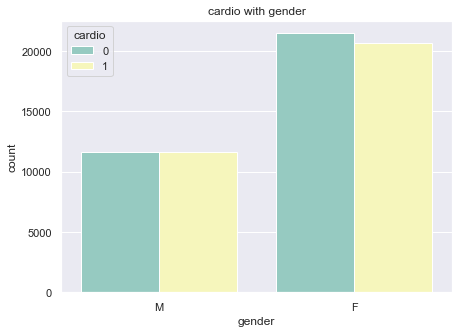

In [67]:
sns.set_style('whitegrid') #to make white grid in the graph
sns.set(rc={'figure.figsize':(7,5)}) # for edit size
sns.countplot(df.gender,hue=df.cardio, palette="Set3"); #make the graph
plt.title('cardio with gender'); # add title

In [39]:
# show count of cardio in every gender
df.groupby(['gender', 'cardio']).agg({'cardio': 'count'})

cardio
gender cardio        
F      0        21467
       1        20640
M      0        11657
       1        11617

the females is more than males so lets try another way with percent (%)

In [40]:
# show count of cardio in every gender in percent
gender_cardio = df.groupby(['gender', 'cardio']).agg({'cardio': 'count'})
gender = df.groupby(['gender']).agg({'cardio': 'count'})
gender_cardio.div(gender, level='gender')* 100

cardio
gender cardio           
F      0       50.982022
       1       49.017978
M      0       50.085933
       1       49.914067

the females more than males in this dataset but when it come with percent they almost **50/50** to have cardiovascular disease 

### 2 Which age group has more has cardiovascular disease?


most the ages that has cardio btween 50-60

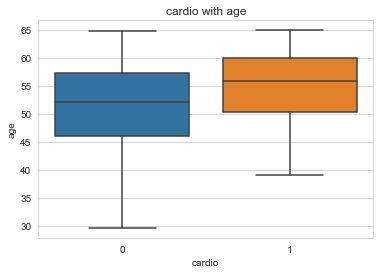

In [41]:
sns.boxplot( x="cardio", y="age", data=df); # make boxplot
plt.title('cardio with age'); #set title

### 3 Patients with cardiovascular disease have high Blood pressure?

Yes, they have higher than patients they dont

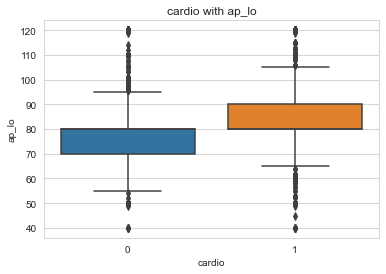

In [42]:
sns.boxplot( x="cardio", y="ap_lo", data=df); # make boxplot
plt.title('cardio with ap_lo'); #set title

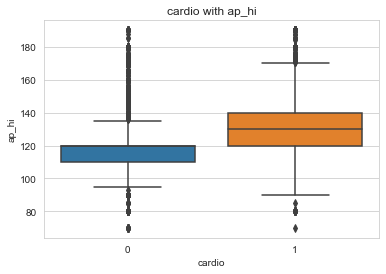

In [43]:
sns.boxplot( x="cardio", y="ap_hi", data=df); # make boxplot
plt.title('cardio with ap_hi'); #set title

# -------------------------------------------------------------------------------------------

## Model :

we will use **Logistic Regression** for predictions if a patient has cardiovascular disease or not

* Step 1: Feature selection
* Step 2: Split the data
* Step 3: Scale the train data
* Step 4: Use Logistic Regression 

### Step 1: Feature selection

In [45]:
df.corr()['cardio'].sort_values(ascending=False) #show correlation for cardio with other features

cardio         1.000000
ap_hi          0.429374
ap_lo          0.336169
age            0.239377
cholesterol    0.218216
BMI            0.183562
weight         0.167538
gluc           0.086210
height        -0.007635
alco          -0.010798
smoke         -0.017629
active        -0.034054
Name: cardio, dtype: float64

Features `ap_hi, ap_lo` are higher (moderate positive correlation) correlation with `cardio`

Feature `cardio` is the predict target to predict the patient have cardiovascular disease or not

### Step 2 : Split the data

In [46]:
X = df[['ap_hi', 'ap_lo']] #seleced feature
y = df['cardio'] #target feature

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split

### Step 3: Scale the train data and test data

In [48]:
sc = StandardScaler() # use StandardScaler
lr = LogisticRegression() # use LogisticRegression

In [49]:
X_train_sc = sc.fit_transform(X_train) # Scale train

In [50]:
X_test_sc = sc.transform(X_test)  # Scale test

### Step 4: Use Logistic Regression 

In [51]:
lr.fit(X_train_sc,y_train) # use LogisticRegression

LogisticRegression()

In [52]:
lr.score(X_train_sc,y_train) #show the train score

0.7125458855919241

train score  = 0.71

In [53]:
y_pred=lr.predict(X_test_sc) # Estimated target

In [54]:
accuracy_score(y_test,y_pred) #test result

0.7056664372562514

the train score is 0.71 

and the test score was 0.705 almost 0.71 

In [55]:
df['cardio'].value_counts() #  balanced data

0    33124
1    32257
Name: cardio, dtype: int64

we have balanced data

### Classification report

to measure the quality of predictions

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.81      0.73      6517
           1       0.76      0.61      0.67      6560

    accuracy                           0.71     13077
   macro avg       0.71      0.71      0.70     13077
weighted avg       0.71      0.71      0.70     13077



Precision is Accuracy of positive predictions.

In [58]:
print(confusion_matrix(y_test, y_pred))

[[5255 1262]
 [2587 3973]]


<img src="https://sebastianraschka.com/images/faq/multiclass-metric/conf_mat.png" width="200" height="100">
